In [1]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim, phys_services
from icecube.icetray import I3Units, OMKey, I3Frame
from I3Tray import *
from icecube.dataclasses import ModuleKey
import numpy as np
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi
import scipy.constants as spc
import SelectingDoublePeakDOM

loaded geometry
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
condition met - 1
condition met - 2
('------------------------NUMBER OF DOMS--------------------------', 9)
('OMKEYS - ', array([ 4., 18.,  0.,  4., 19.,  0.,  5., 18.,  0.]))
1110
1111
1112
1113
1114
condition met - 1
1115
condition met - 1
condition met - 2
('------------------------NUMBER OF DOMS--------------------------', 9)
('OMKEYS - ', array([7., 7., 0., 7., 8., 0., 7., 9., 0.]))
1116
condition met - 1
1117
1118
1119
1120
1121
1122
1123
1124
1125
condition met - 1
1126
1127
1128
1129
condition met - 1
condition met - 2
('------------------------NUMBER OF DOMS--------------------------', 6)
('OMKEYS - ', array([ 4., 19.,  0.,  9., 19.,  0.]))
1130
1131
1132
1133
1134
condition met - 1
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
condition met - 1
condition met - 2
('------------------------NUMBER OF DOMS--------------------------', 9)
('OMKEYS - ', array([ 3., 15.,  0.,  3., 16.,  0.,  3., 17.,  0.]

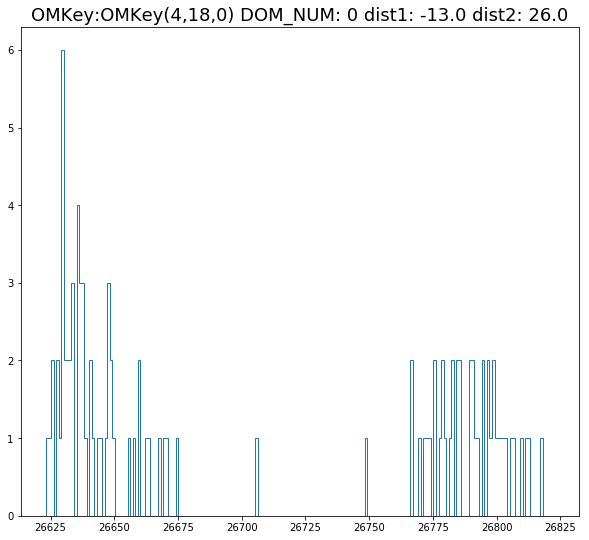

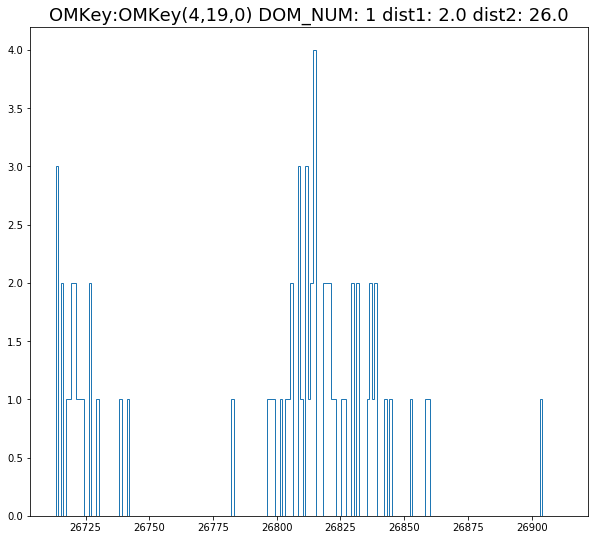

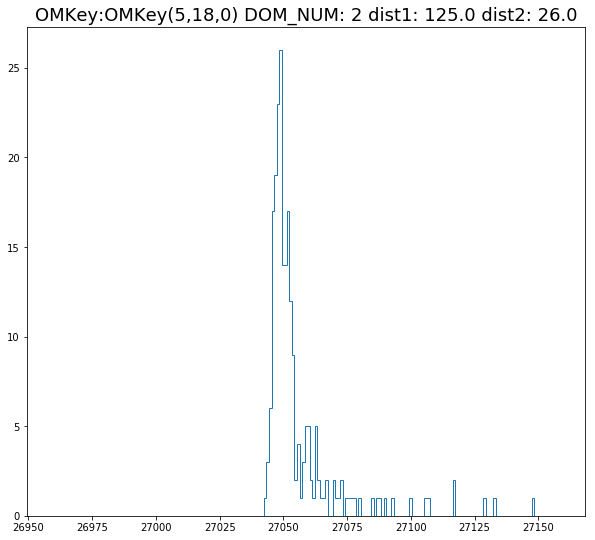

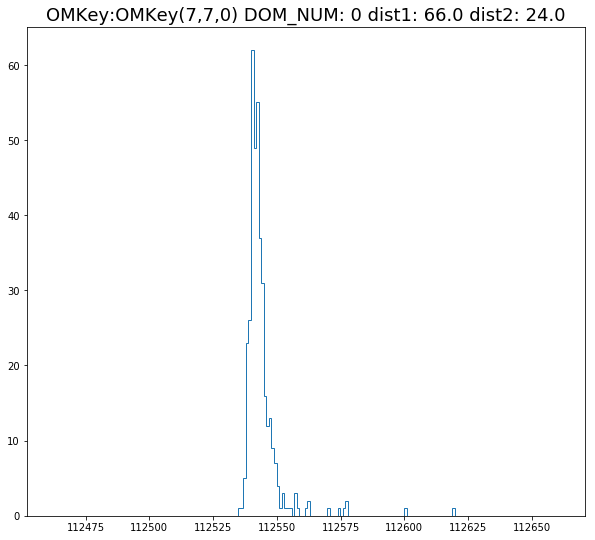

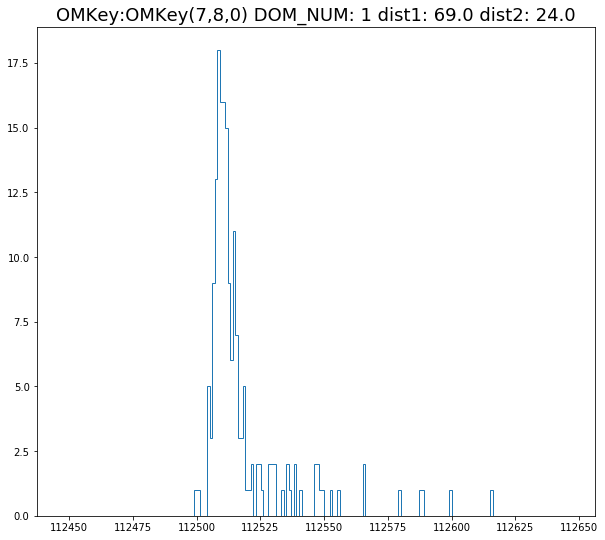

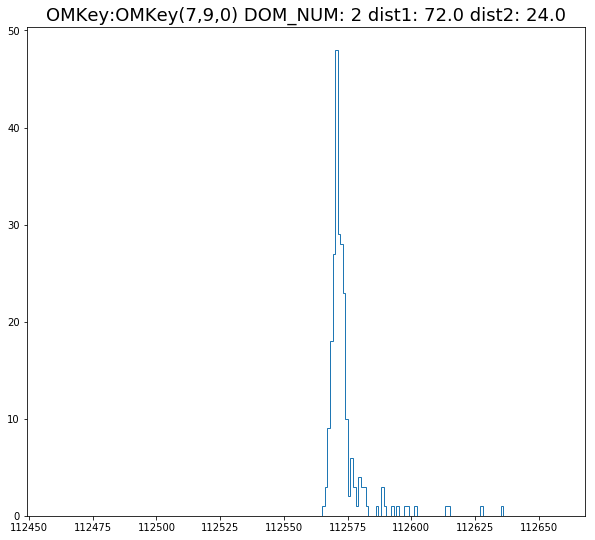

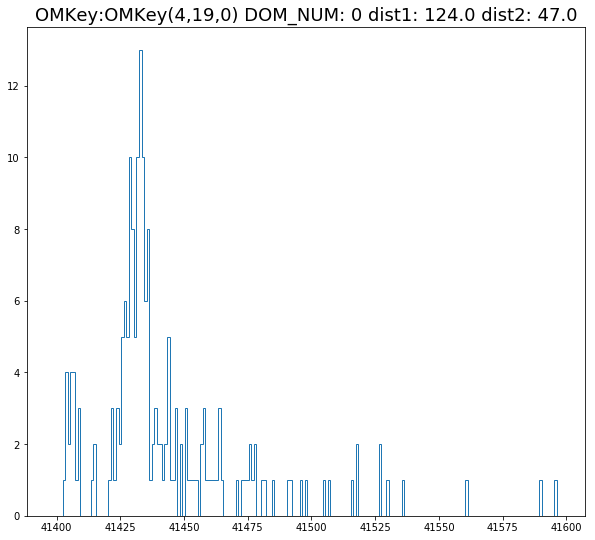

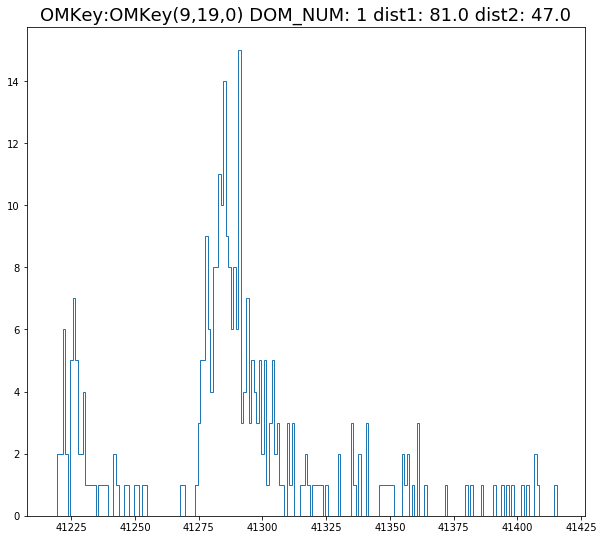

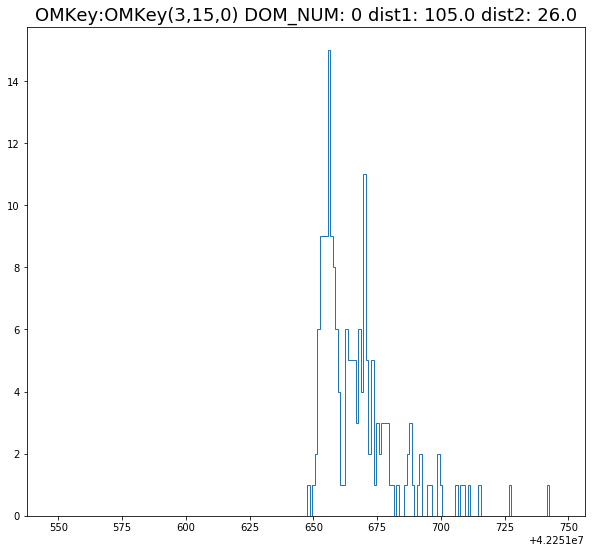

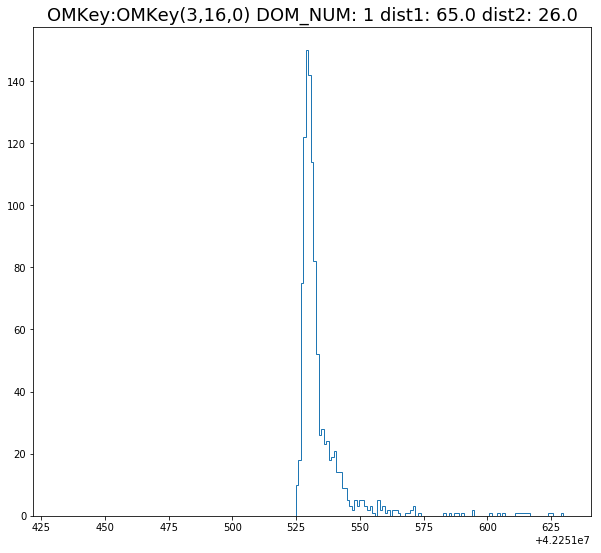

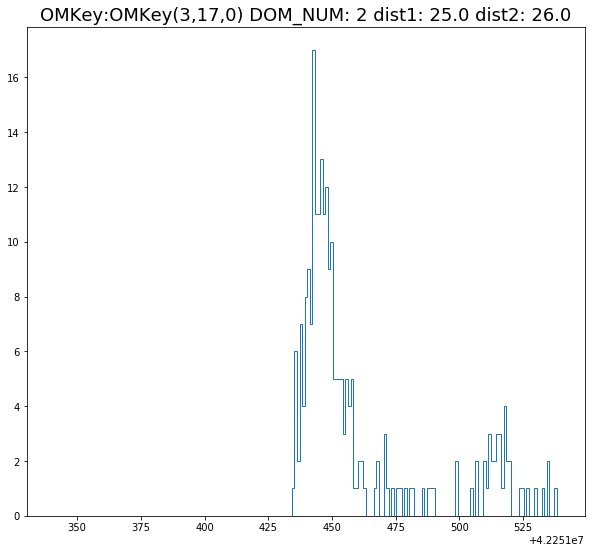

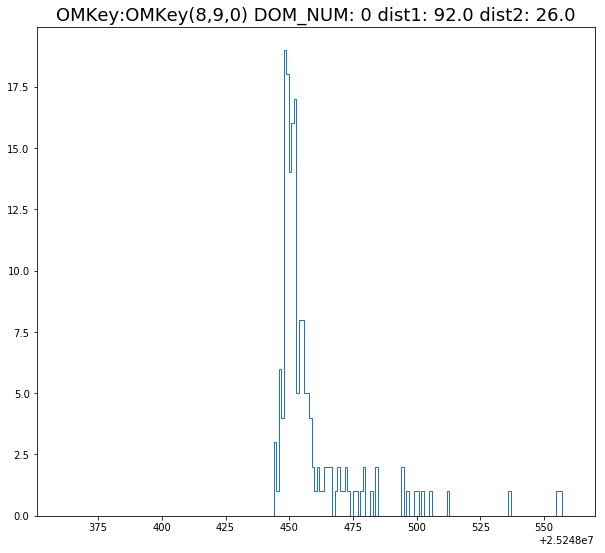

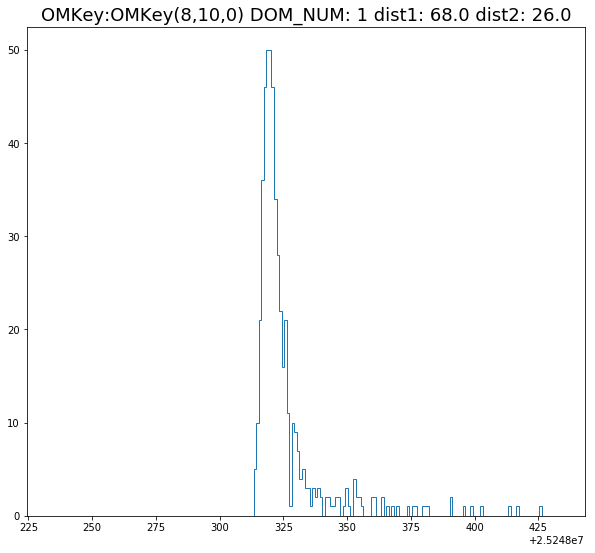

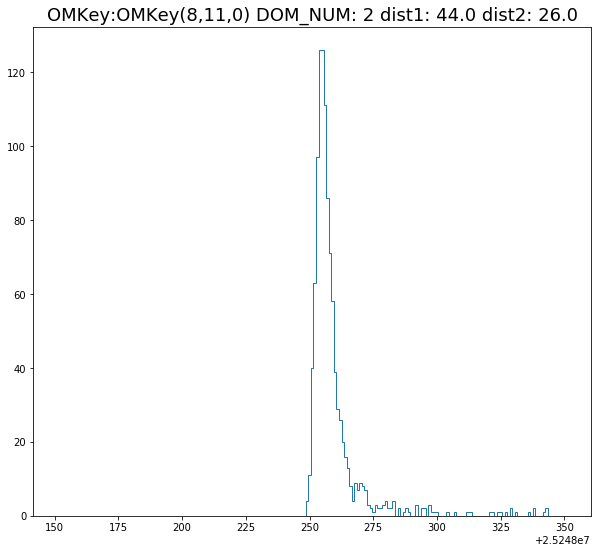

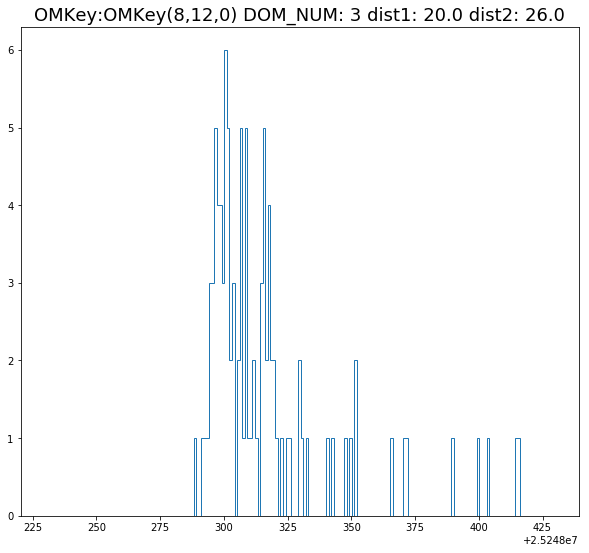

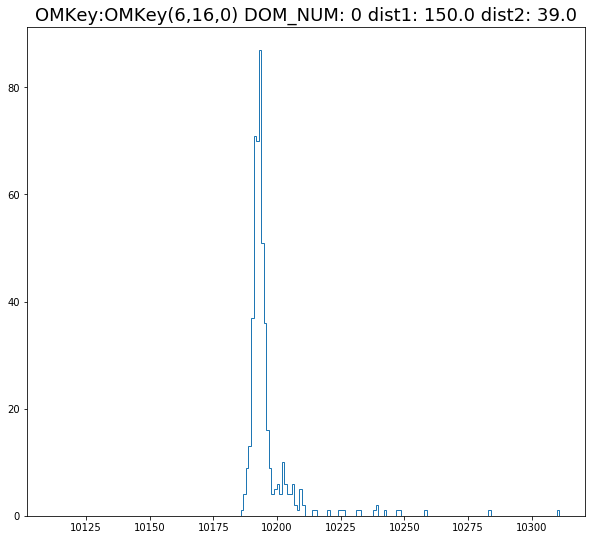

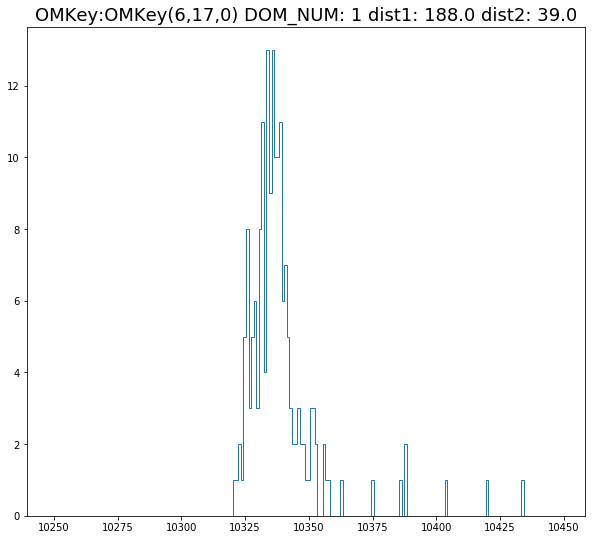

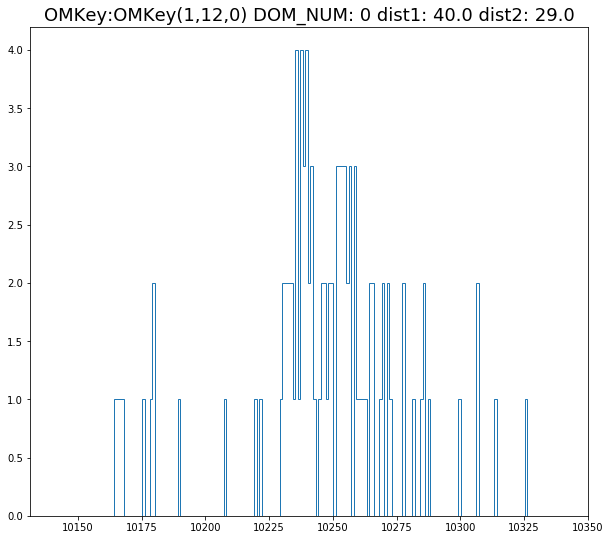

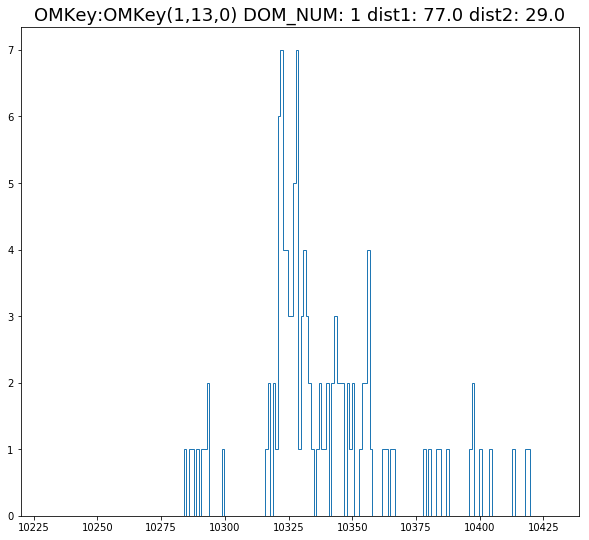

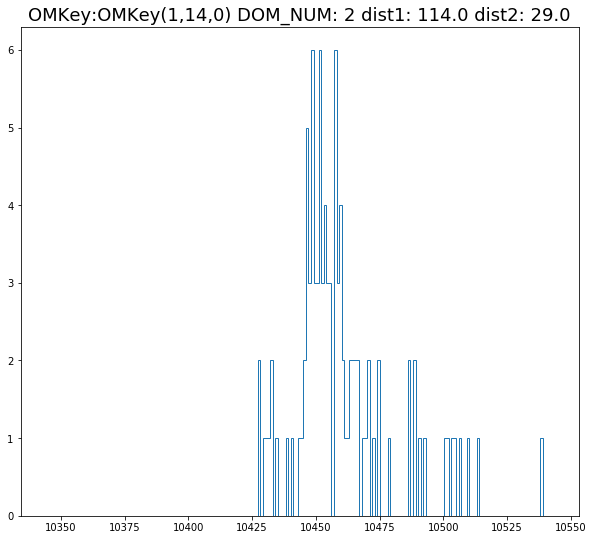

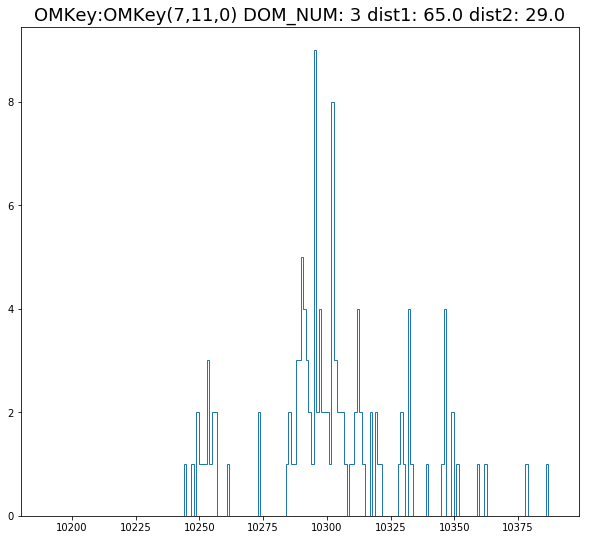

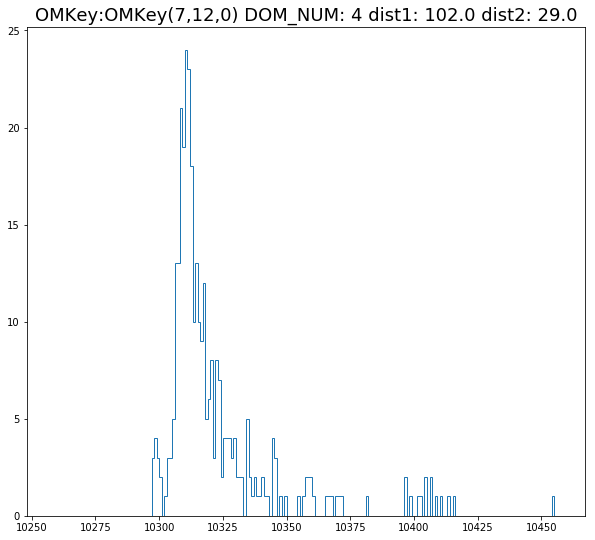

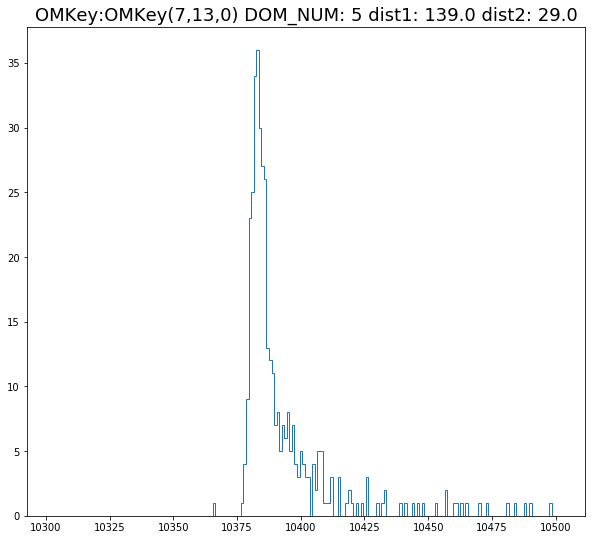

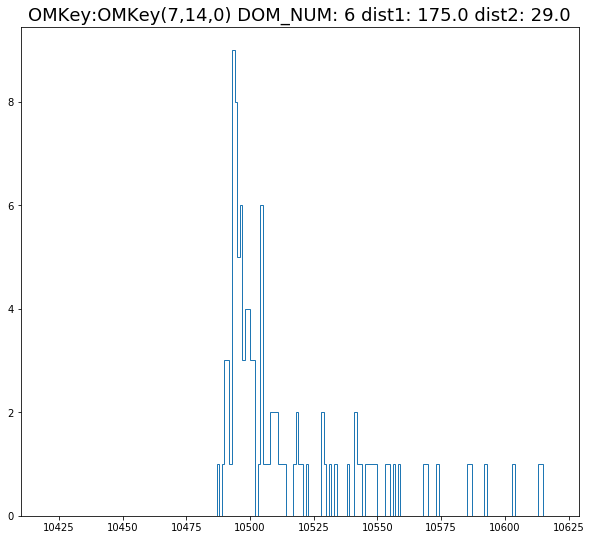

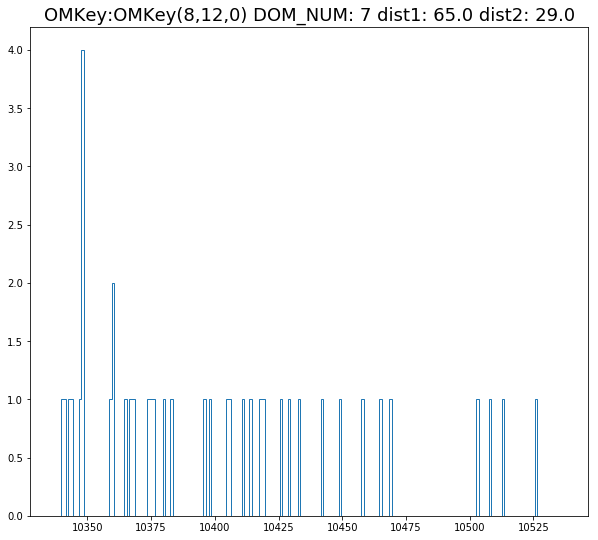

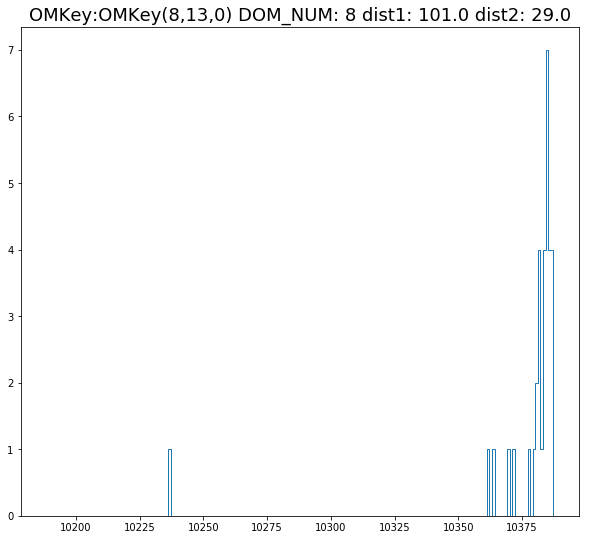

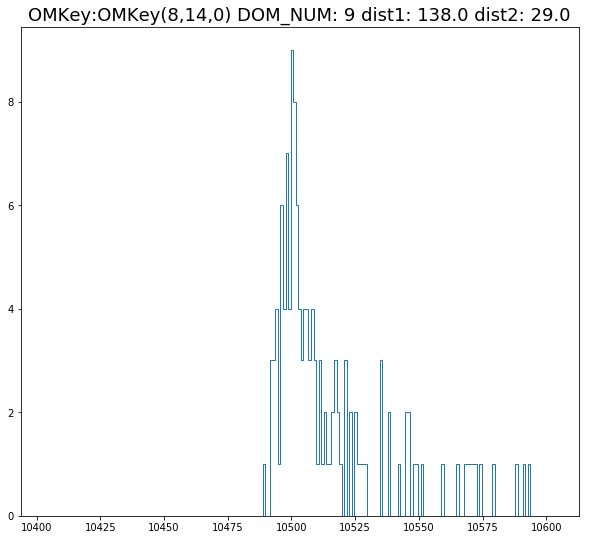

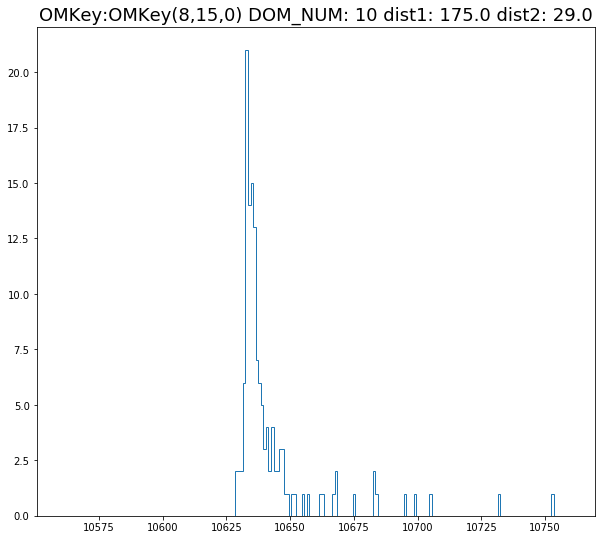

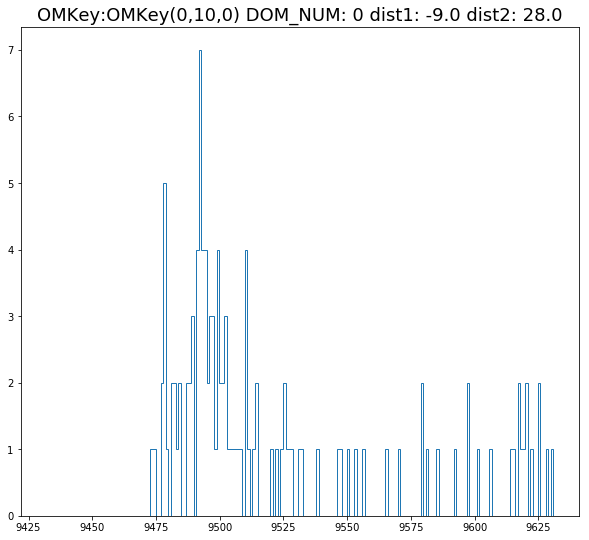

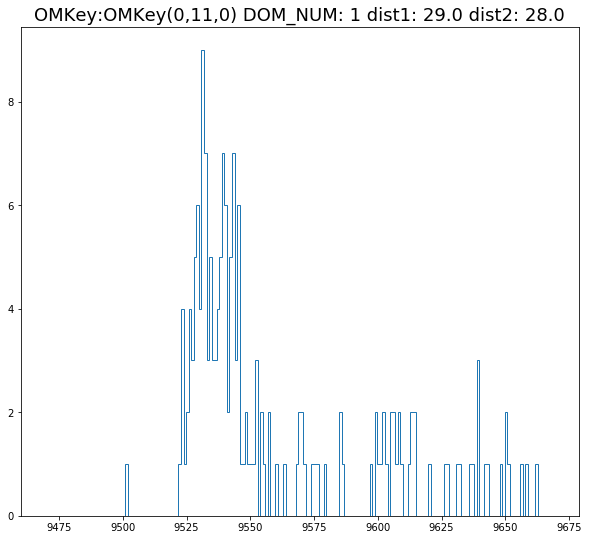

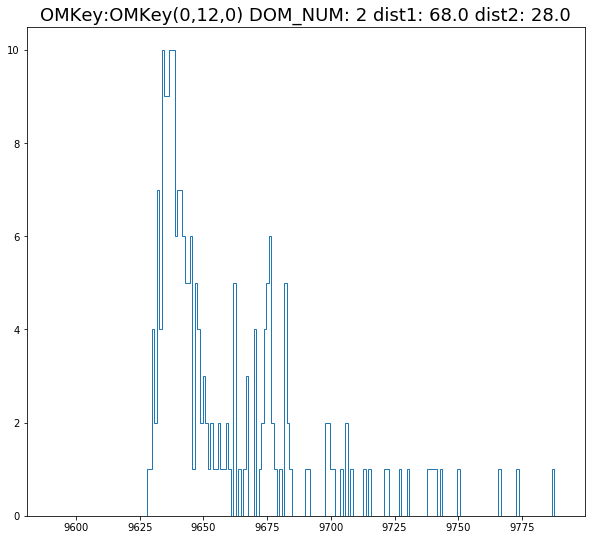

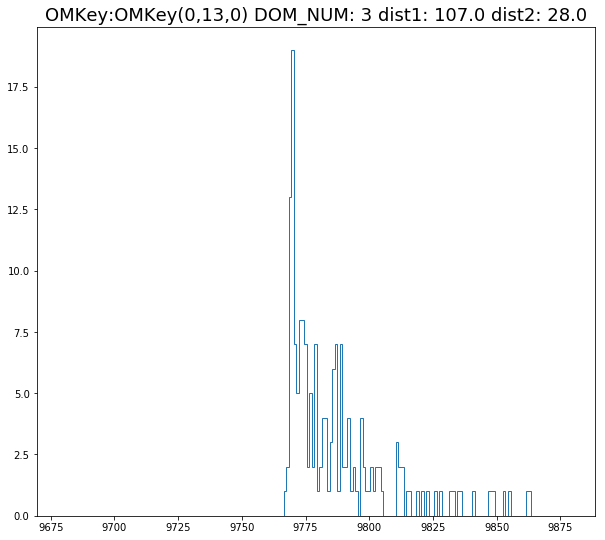

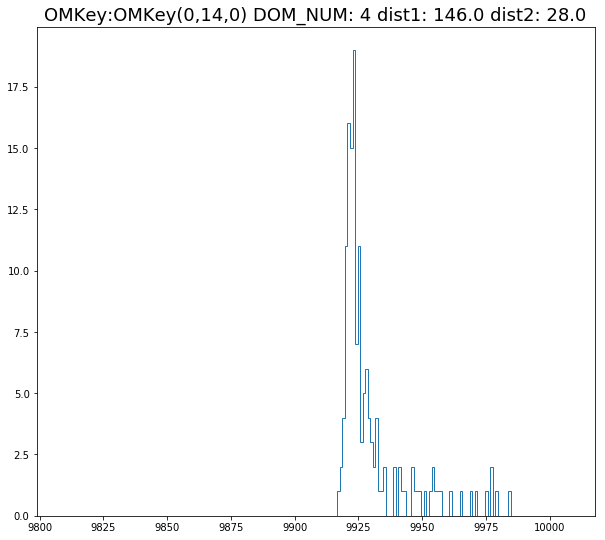

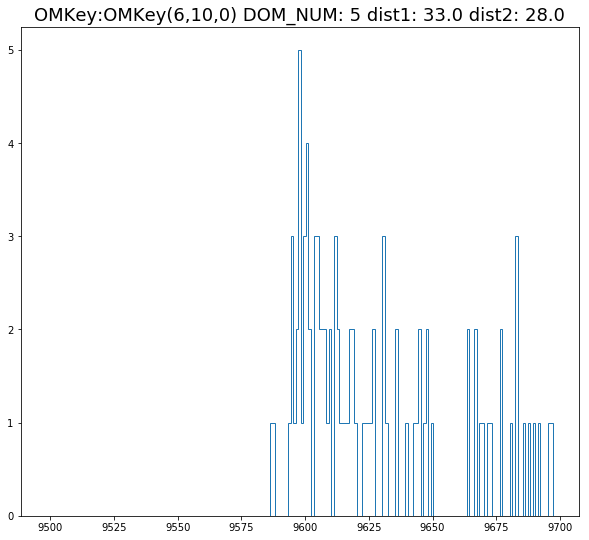

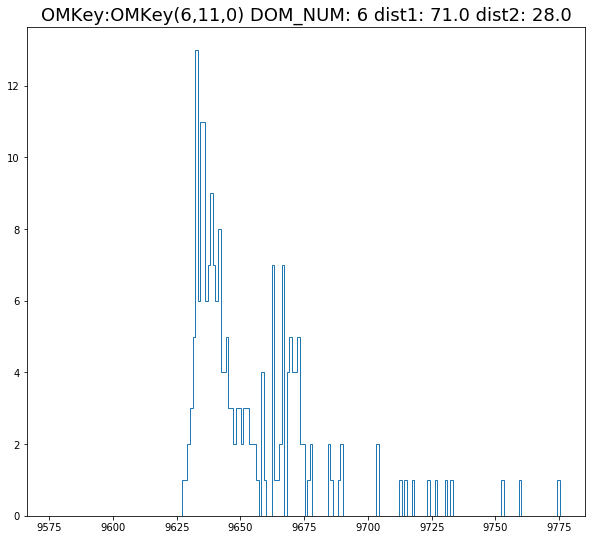

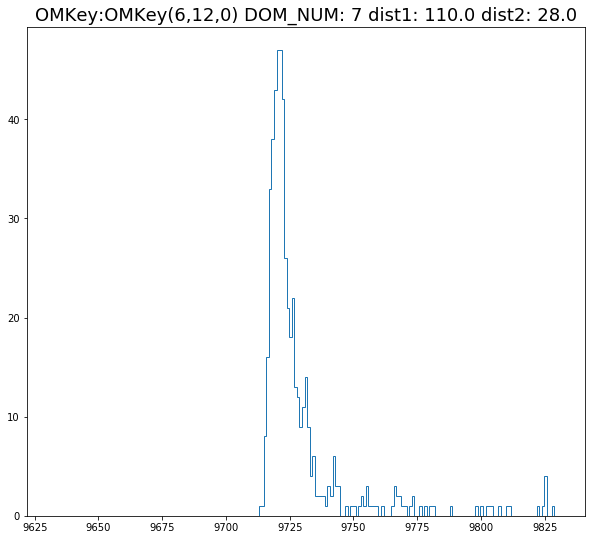

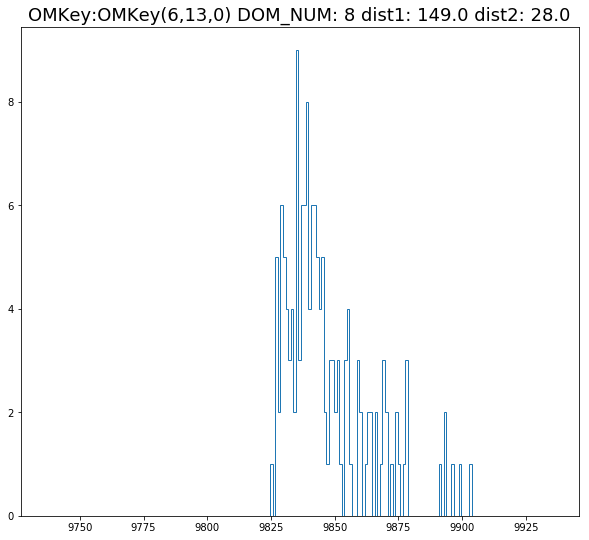

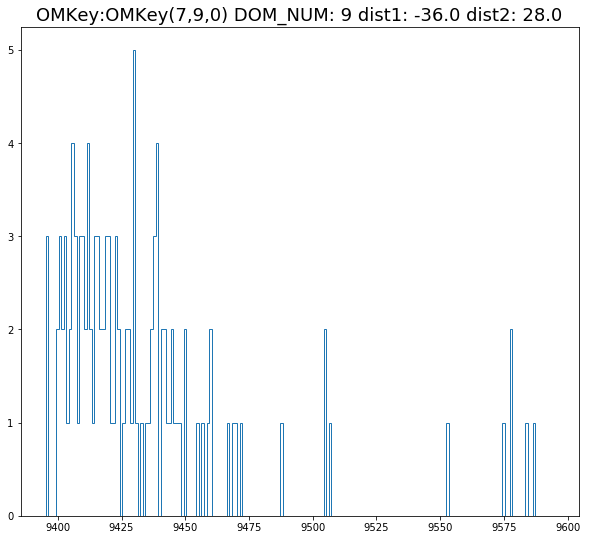

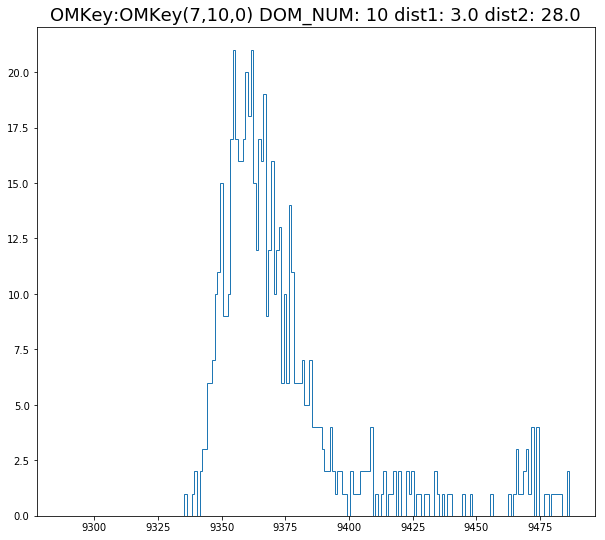

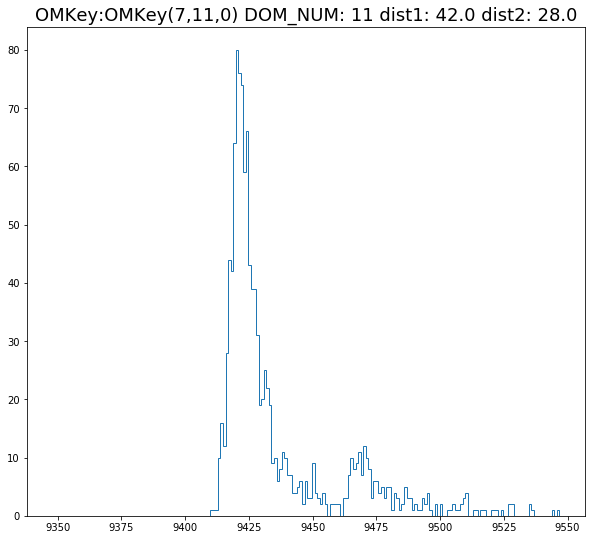

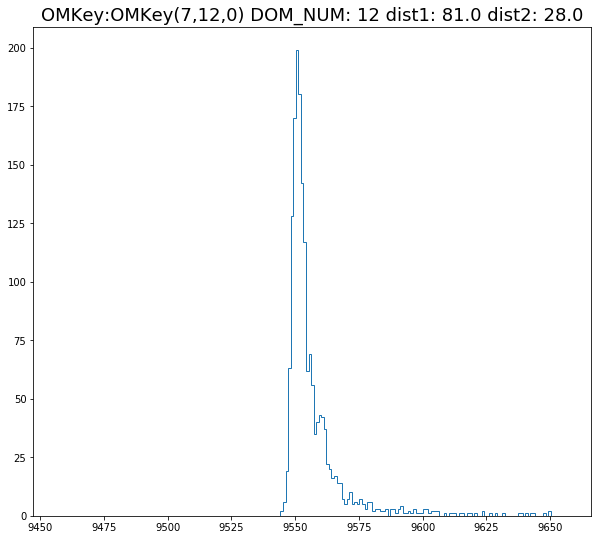

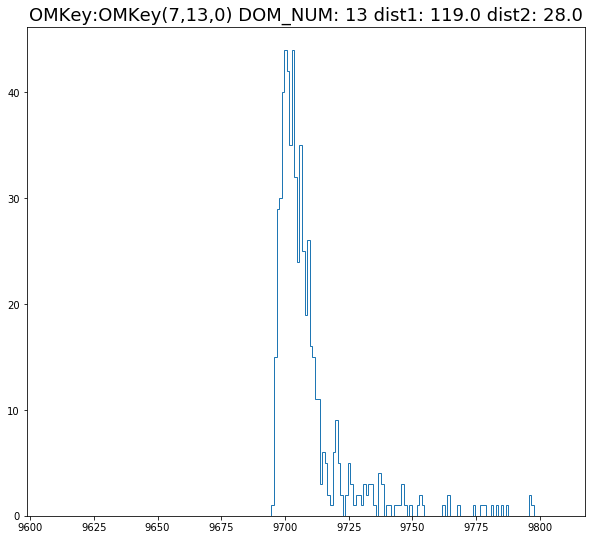

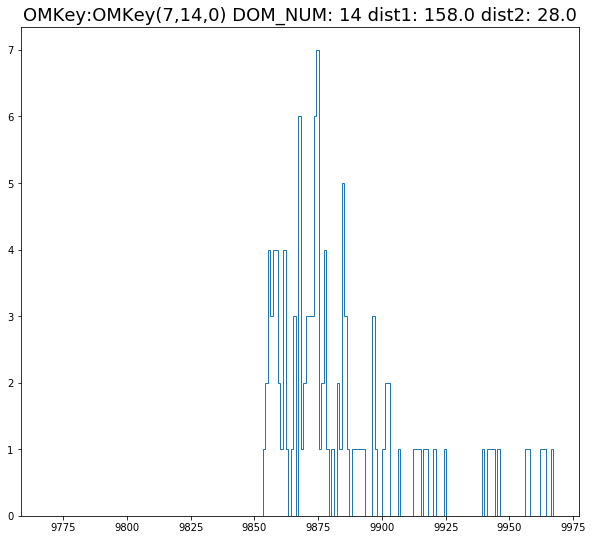

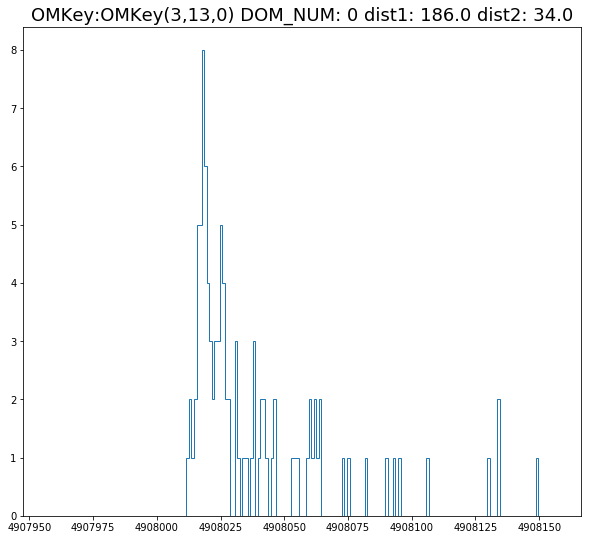

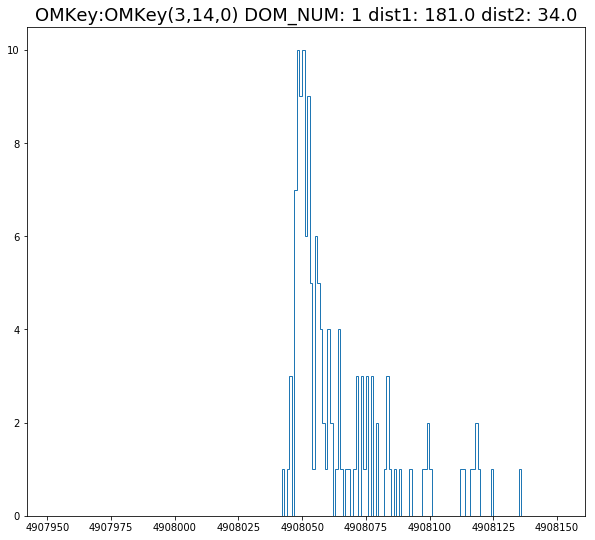

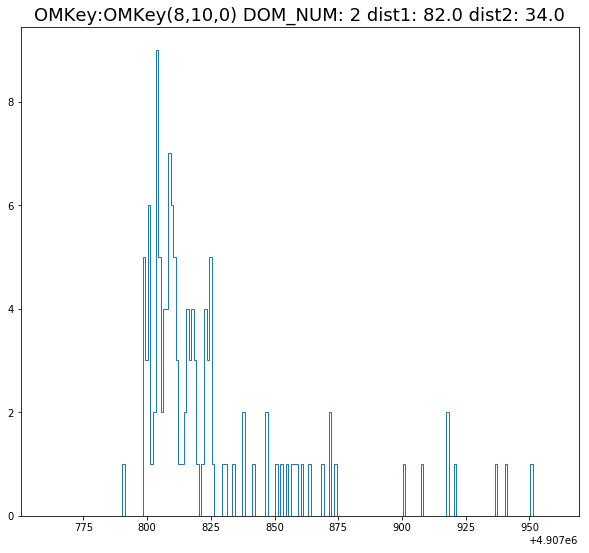

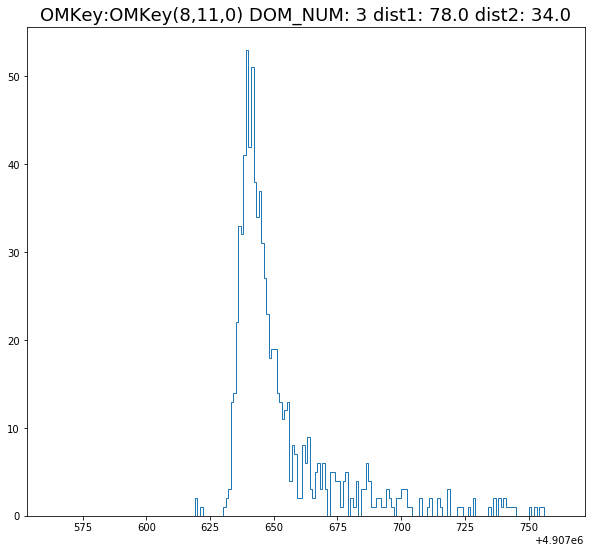

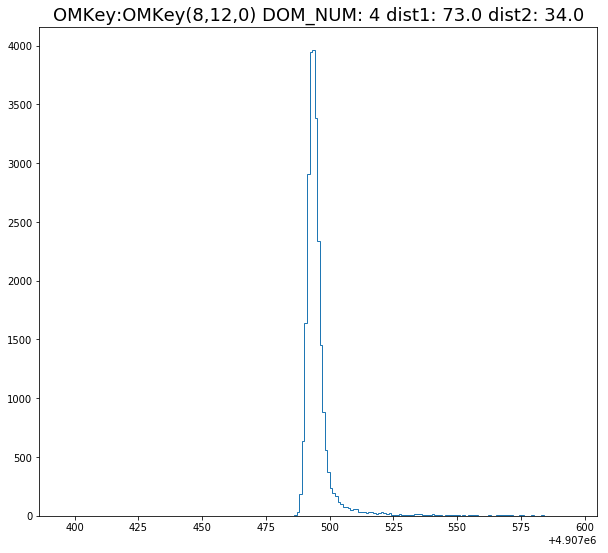

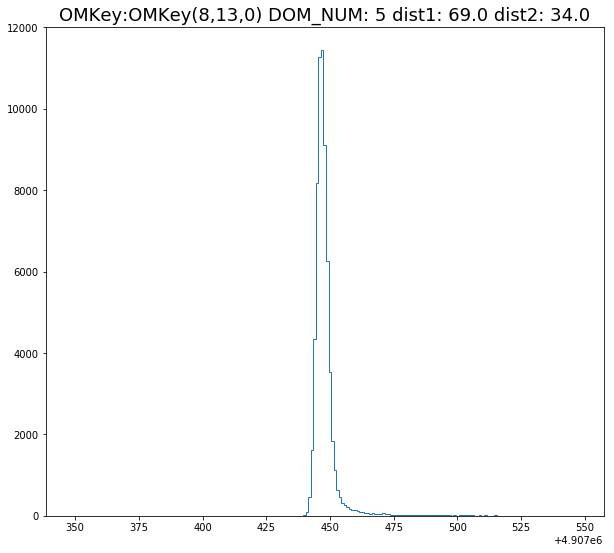

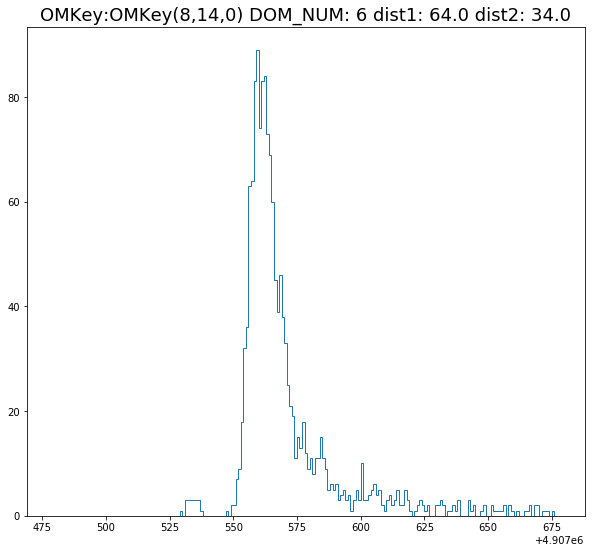

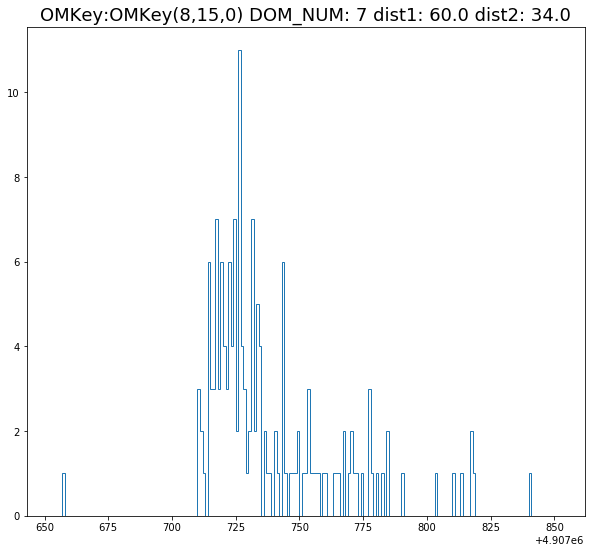

In [3]:
'''

Loading the geometry

'''

gcd_file = '/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz'
gcd = dataio.I3File(gcd_file)
cframe = gcd.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo
print('loaded geometry')

#infile = '/data/p-one/akatil/step_4_medium_water/NuTau_NuE_20Events/Nustep_4_506_medium_water_custom_mDOM_noise.i3.gz'
inFileList = []
start = 1100
end = 1300

for i in range(start, end):
    if i == 1552:
        continue
    inDir = "/data/p-one/akatil/step_4_medium_water/NuTau_NuE_20Events/"
    inFile = 'step_4_'+str(i)+'_medium_water_custom_mDOM_noise.i3.gz'
    inFileList.append(inDir+inFile)
    
outDir = '/data/p-one/akatil/double_peak_studies/NuTau_NuE_20Events/'
#outfile = '/data/p-one/akatil/test/step_4_506_medium_water_doublePeak.i3.gz'

def getListOfFiles(dirName):
     
    # create a list of file and sub directories 
    # names in the given directory 
 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                 
    return allFiles

dirName = "/data/p-one/akatil/step_4_medium_water/NuTau_NuE_20Events/"
  
#listOfFiles = getListOfFiles(dirName)
#listOfFiles = os.listdir(dirName)

#print (listOfFiles)
# sort filenames by creation date (ascending)
#sorted_files = sorted(listOfFiles, key=os.path.getmtime)

#selectFiles  =  sorted_files[0:500]

file_num = start
for file in inFileList:
    print file_num
    tray = I3Tray()

    tray.AddModule('I3Reader', 'reader',
                FilenameList = [gcd_file, file]
                )

    tray.AddModule(SelectingDoublePeakDOM.definingDOMs, "Double Peak Selector",
                   omgeo = omgeo,
                   InputMCPETree = "MCPESeriesMap",
                   NoiseMCPETree = "NoiseSeriesMap",
                   OutputMCPETree = "DoublePeakSeriesMap")
    
    tray.AddModule("I3Writer","writer",
                   #SkipKeys=SkipKeys,
                   Filename = outDir+'double_peak_'+str(file_num)+'.i3.gz',
                   Streams = [icetray.I3Frame.DAQ, icetray.I3Frame.Physics],
                  )

    
    tray.AddModule("TrashCan","sayonara")
    tray.Execute()
    tray.Finish()
    
    file_num += 1

In [1]:
gcd_file = '/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz'
gcd = dataio.I3File(gcd_file)
cframe = gcd.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo
print('loaded geometry')

import matplotlib.pylab as plt
outDir = '/data/p-one/akatil/double_peak_studies/NuTau_NuE_20Events/'
dist_all = ([])
event_brightness = ([])
event_brightness_physics = ([])
minDist = ([])
minDist_physics = ([])
CoG_dist_diff = ([])
dp_DOM_distDiff = ([])
string_diff = ([])
dist_bw_string =([])

for i in range(0, 2000):
    if i == 1552:
        continue
    double_peak_file = dataio.I3File(outDir + 'double_peak_'+str(i)+'.i3.gz')
    print(i)
    for frame in double_peak_file:
        '''
        mctree = frame["I3MCTree"]
        doublePeakMap = simclasses.I3MCPESeriesMap()
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

        if lepton.type == 15 or lepton.type == -15:
            print(lepton.type)

            tau_daughters = dataclasses.I3MCTree.get_daughters(mctree, lepton.id)
            tau_pos = lepton.pos
            x_tau_pos = tau_pos.x
            y_tau_pos = tau_pos.y
            z_tau_pos = tau_pos.z
            
            if x_tau_pos > 250 or y_tau_pos > 250 or lepton.length < 3:
                continue
            
            for td in range(0, len(tau_daughters)):
                print('Daughters', tau_daughters[td].type)
                if tau_daughters[td].type == 16 or tau_daughters[td].type == -16:
                    tau_daughters_pos = tau_daughters[td].pos
                    x_td_pos = tau_daughters_pos.x
                    y_td_pos = tau_daughters_pos.y
                    z_td_pos = tau_daughters_pos.z
                    
                    
                if x_td_pos > 250 or y_td_pos > 250 or z_td_pos > 250:
                    continue
        '''     
                        
        CoG = frame['CoG']
        CoG_doublePeak = frame['CoG_doublePeak']
        CoG_physics = frame['CoG_physics']
        dist = np.sqrt((CoG.x - CoG_doublePeak.x)**2+(CoG.y - CoG_doublePeak.y)**2+(CoG.z - CoG_doublePeak.z)**2)
        dist_all = np.append(dist_all, dist)
        
        mcpeMap = frame["MCPESeriesMap"]
        noiseMap = frame["NoiseSeriesMap"]
        doublePeakMap = frame["DoublePeakSeriesMap"]
        charge = ([])
        charge_physics = ([])
        dist_to_DOM = ([])
        dist_to_DOM_physics = ([])
        timeList_doublePeak_array = ([])
        string_double_peak = ([])
        x_dp, y_dp, z_dp = ([]), ([]), ([])
        
        for omkey in noiseMap.keys():
            
            oKey = omgeo.get(omkey)

            domPos = oKey.position
            x_dom = domPos.x
            y_dom = domPos.y
            z_dom = domPos.z
            
            noise_mcpeList = noiseMap[omkey]
            noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])

            if omkey in mcpeMap.keys():
                mcpeList = mcpeMap[omkey]
                timeList = np.array([mcpe.time for mcpe in mcpeList])
                tot_timeList = np.append(timeList, noise_timeList)
                charge_physics = np.append(charge_physics, len(timeList))
            else:
                tot_timeList = noise_timeList
                
            if omkey in doublePeakMap.keys():
                print('OMKEY - ', omkey)
                mcpe_doublePeak = doublePeakMap[omkey]
                timeList_doublePeak = [mcpe.time for mcpe in mcpe_doublePeak]
                #print('List - ', len(timeList_doublePeak))
                timeList_doublePeak_array = np.append(timeList_doublePeak_array, timeList_doublePeak)
                #print('Array- ', len(timeList_doublePeak_array))
                
                d = np.sqrt((CoG.x - x_dom)**2+(CoG.y - y_dom)**2+(CoG.z - z_dom)**2)
                d_physics = np.sqrt((CoG_physics.x - x_dom)**2+(CoG_physics.y - y_dom)**2+(CoG_physics.z - z_dom)**2)
                dist_to_DOM = np.append(dist_to_DOM, d)
                dist_to_DOM_physics = np.append(dist_to_DOM_physics, d_physics)
                
                string_double_peak = np.append(string_double_peak, omkey[0])
                
                x_dp = np.append(x_dp, x_dom)
                y_dp = np.append(y_dp, y_dom)
                z_dp = np.append(z_dp, 0)
                
                dist_bw_string = np.append(dist_bw_string, np.sqrt((x_tau_pos - x_dom)**2+(y_tau_pos - y_dom)**2))

            charge = np.append(charge, len(tot_timeList))
            
            
        calc_diff = np.sqrt((x_dp[1:] - x_dp[:-1])**2+(y_dp[1:] - y_dp[:-1])**2+(z_dp[1:] - z_dp[:-1])**2)
        dp_DOM_distDiff = np.append(dp_DOM_distDiff, calc_diff)
        CoG_dist_diff = np.append(CoG_dist_diff, dist_to_DOM - min(dist_to_DOM))
        string_diff = np.append(string_diff, abs(string_double_peak[1:] - string_double_peak[:-1]))
        
        #print(len(dist_to_DOM), len(doublePeakMap.keys()))
        #print(timeList_doublePeak_array[0])
        event_brightness = np.append(event_brightness, sum(charge))
        event_brightness_physics = np.append(event_brightness_physics, sum(charge_physics))
        minDist = np.append(minDist, min(dist_to_DOM)) 
        minDist_physics = np.append(minDist_physics, min(dist_to_DOM_physics))
        
        
        '''
        for j in range(0, len(dist_to_DOM)):
            if dist_to_DOM[j] == min(dist_to_DOM):
                minOMKey = doublePeakMap.keys()[j]
                select_mcpe = doublePeakMap[minOMKey]
                selectTimeList = np.array([mcpe.time for mcpe in select_mcpe])
                
                plt.figure(figsize=(10, 9))
                mean = selectTimeList.mean()
                bins = np.arange(mean - 100, mean + 101, 1)
                plt.hist(selectTimeList, bins = bins, histtype='step')
                
                
       

        #print(CoG.x)
        '''

NameError: name 'dataio' is not defined

In [ ]:
len(string_diff), len(CoG_dist_diff), len(dp_DOM_distDiff)

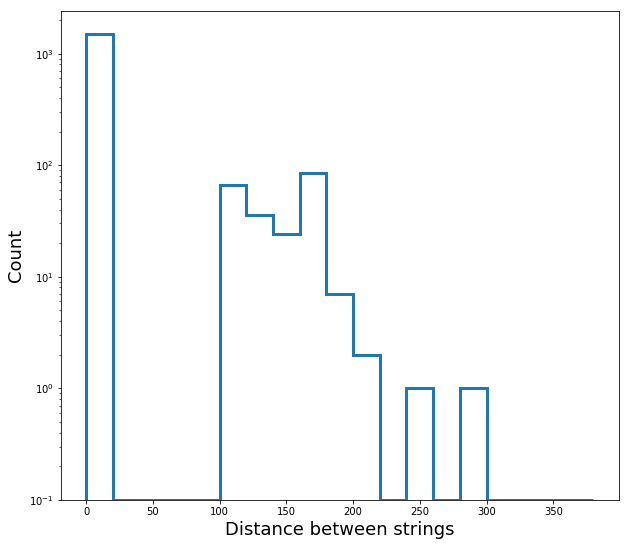

In [17]:
plt.figure(figsize=(10,9))
bins = np.arange(min(dp_DOM_distDiff), max(dp_DOM_distDiff)+10, 20)
plt.hist(dp_DOM_distDiff, bins=bins, histtype='step', linewidth=3, log=True)
plt.xlabel('Distance between strings', fontsize=18)
plt.ylabel('Count', fontsize=18)

(array([837.,   0.,   0.,   0., 529.,   0.,   0.,   0., 319.,   0.,  74.,
         53., 185.,  85.,   0.,  33.,  84., 140.,  11.,  72.,  40.,  35.,
          8.,  17.,   9.,   2.,  10.,   4.,   1.,   9.,   0.,   1.,   2.,
          0.,   0.,   1.,   0.,   0.,   1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390.]),
 <a list of 1 Patch objects>)

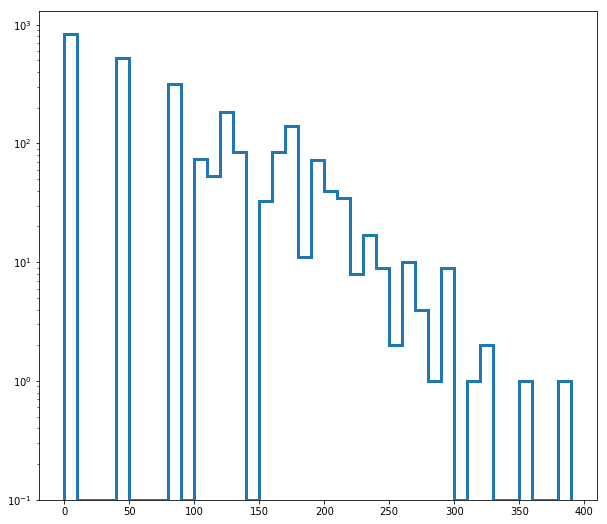

In [17]:
plt.figure(figsize=(10,9))
bins = np.arange(0, max(dp_DOM_distDiff)+10, 10)
plt.hist(dp_DOM_distDiff, bins=bins, histtype='step', linewidth=3, log=True)

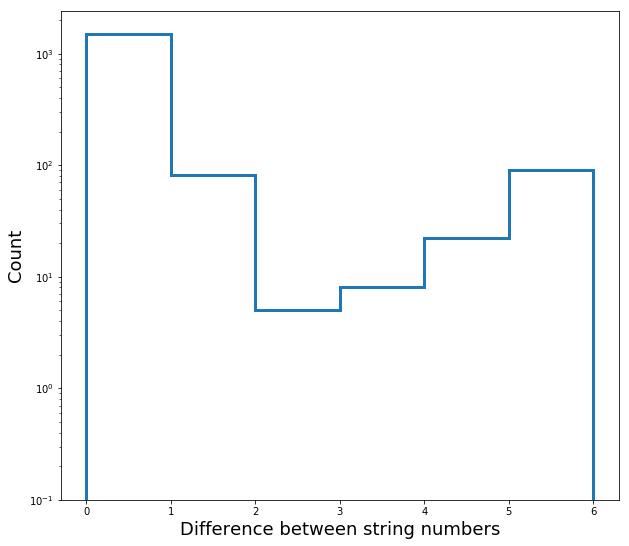

In [8]:
plt.figure(figsize=(10,9))
bins = np.arange(0, max(string_diff), 1)
_ = plt.hist(string_diff, bins = bins, histtype='step', linewidth=3, log=True)
plt.xlabel('Difference between string numbers', fontsize=18)
plt.ylabel('Count', fontsize=18)

In [9]:
len(string_diff[string_diff == min(string_diff)]), max(string_diff)

(1502, 7.0)

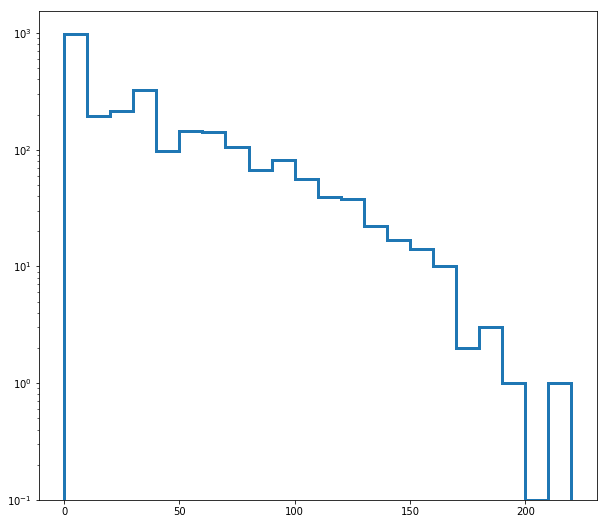

In [5]:
plt.figure(figsize=(10,9))
bins = np.arange(0, max(CoG_dist_diff)+10, 10)
_ = plt.hist(CoG_dist_diff, bins=bins, histtype='step', linewidth=3, log=True)

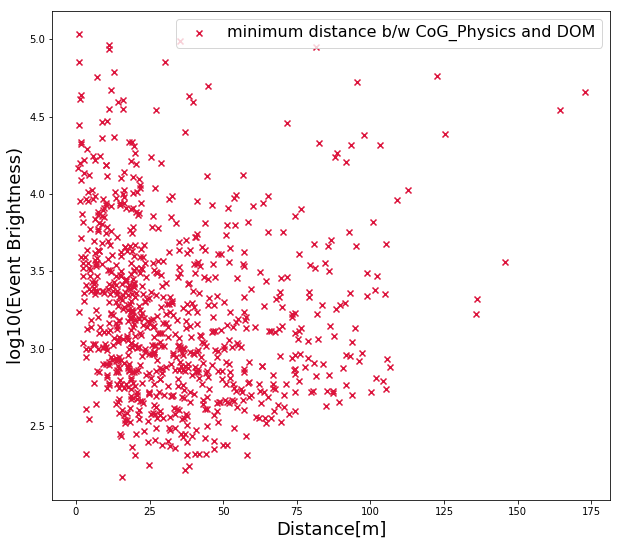

In [18]:
import matplotlib.pylab as plt
plt.figure(figsize=(10,9))
#plt.scatter(dist_all, np.log10(event_brightness), c='crimson', marker='x', linewidths=0.3, edgecolors='k', label = 'distance b/w CoG and CoG doublePeak')
plt.scatter(minDist, np.log10(event_brightness), c='crimson', marker='x', linewidths=0.3, edgecolors='k', label = 'minimum distance b/w CoG and DOM')
#plt.scatter(minDist_physics, np.log10(event_brightness_physics), c='crimson', marker='x', linewidths=0.3, edgecolors='k', label = 'minimum distance b/w CoG_Physics and DOM')
plt.xlabel('Distance[m]', fontsize = 18)
plt.ylabel('log10(Event Brightness)', fontsize = 18)
plt.legend(fontsize = 16)

(array([ 45.,  63.,  87., 117.,  74.,  63.,  47.,  59.,  52.,  30.,  36.,
         26.,  16.,  21.,  20.,  14.,  13.,  14.,  12.,   7.,   7.,   6.,
          1.,   0.,   1.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,   1.,
          0.,   1.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175.]),
 <a list of 1 Patch objects>)

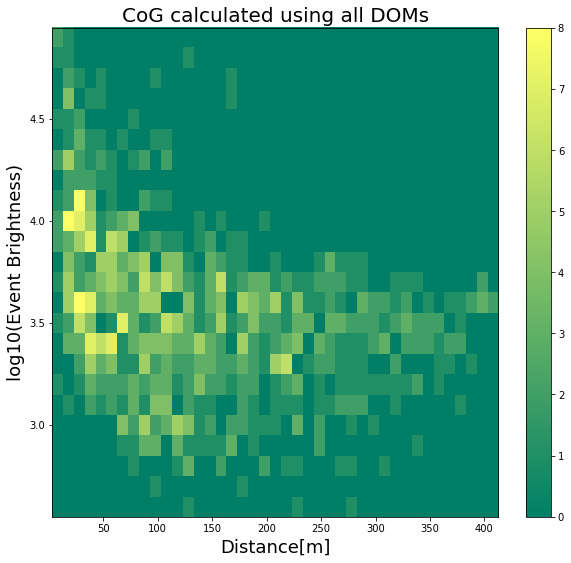

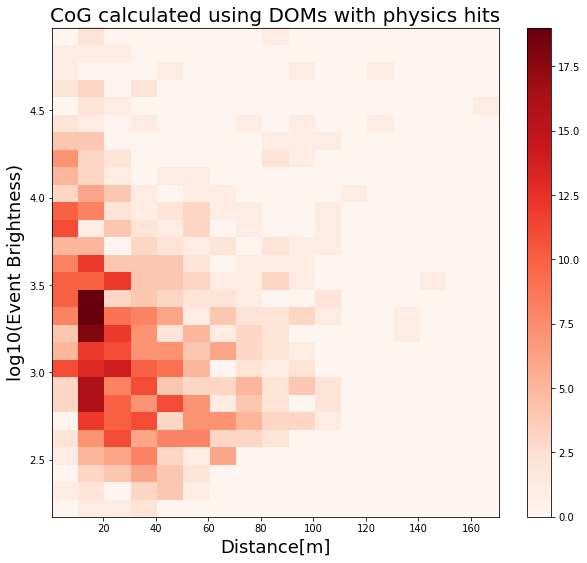

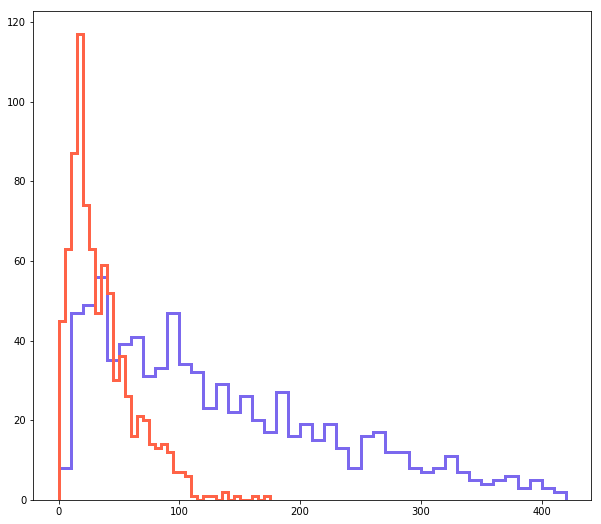

In [21]:
plt.figure(figsize=(10,9))
binsX = np.arange(min(minDist), max(minDist), 10)
binsY = np.arange(min(np.log10(event_brightness)), max(np.log10(event_brightness)), 0.1)
plt.hist2d(minDist, np.log10(event_brightness), bins=[binsX, binsY], cmap=plt.cm.summer)
plt.xlabel('Distance[m]', fontsize = 18)
plt.ylabel('log10(Event Brightness)', fontsize = 18)
plt.title('CoG calculated using all DOMs', fontsize=20)
plt.colorbar()

plt.figure(figsize=(10,9))
binsX = np.arange(min(minDist_physics), max(minDist_physics), 10)
binsY = np.arange(min(np.log10(event_brightness_physics)), max(np.log10(event_brightness_physics)), 0.1)
plt.hist2d(minDist_physics, np.log10(event_brightness_physics), bins=[binsX, binsY], cmap=plt.cm.Reds)
plt.xlabel('Distance[m]', fontsize = 18)
plt.ylabel('log10(Event Brightness)', fontsize = 18)
plt.title('CoG calculated using DOMs with physics hits', fontsize=20)
plt.colorbar()

plt.figure(figsize=(10,9))
bins = np.arange(0, max(minDist)+5, 10)
plt.hist(minDist, bins=bins, histtype='step', color='mediumslateblue', linewidth=3)
bins = np.arange(0, max(minDist_physics)+5, 5)
plt.hist(minDist_physics, bins=bins, histtype='step', color='tomato', linewidth=3)

In [54]:
len(dist_all)

853

In [29]:
plt.scatter?

In [ ]:
dataclasses.I3Pos

In [ ]:
mean = tot_timeList.mean()
                    timestamps = tot_timeList - mean
                    final_mean = timestamps.mean()

                    bins = np.arange(final_mean - 100, final_mean + 100, 1)
                    num, bin_edges = np.histogram(timestamps, bins=bins)
                    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

                    print('MINIMIZER')
                    nll = lambda *args: log_likelihood_biGauss(*args)
                    initial_biGauss = np.array([final_mean, 50, 5, max(num)])
                    bnds_biGauss = ((min(bin_centers), max(bin_centers)), (0, 100), (0, 10), (0, 1e6))
                    soln_biGauss = minimize(log_likelihood_biGauss, initial_biGauss,
                                            args=(num, bin_centers),
                                            method='Powell',
                                            bounds = bnds_biGauss)

                    #Double Peak

                    nll = lambda *args: log_likelihood_doublePeak(*args)
                    initial_doublePeak = np.array([min(bin_centers)+10, 20, 1, max(num), final_mean, 20, 1, max(num)])
                    bnds_doublePeak = ((min(bin_centers), final_mean), (0, 100), (0, 10), (0, 1e6),
                                        (final_mean, max(bin_centers)), (0, 100), (0, 10), (0,1e6))
                    soln_doublePeak = minimize(log_likelihood_doublePeak, initial_doublePeak,
                                                args=(num, bin_centers),
                                                method='Powell',
                                                bounds=bnds_doublePeak)

                    print('LOG_LIKELIHOOD_RATIO')

                    LR_biGauss = likelihood_ratio_biGauss(bin_centers[num>0], num[num>0], soln_biGauss.x[0],
                                                          soln_biGauss.x[1], soln_biGauss.x[2], soln_biGauss.x[3])
                    LR_doublePeak = likelihood_ratio_doublePeak(bin_centers[num>0], num[num>0], soln_doublePeak.x[0],
                                                                soln_doublePeak.x[1],soln_doublePeak.x[2],
                                                                soln_doublePeak.x[3], soln_doublePeak.x[4],
                                                                soln_doublePeak.x[5], soln_doublePeak.x[6],
                                                                soln_doublePeak.x[7])

                    print('TIME DIFFERENCE')
                    timeDifference_doublePeak = soln_doublePeak.x[4] - soln_doublePeak.x[0]